In [32]:
# Essensial libraries

import pandas as pd
import numpy as np

# Plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG

# Scikit-Learn libraries

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Artificial Neural Networks

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import model_to_dot

# Additional

np.random.seed(123)
%matplotlib inline

### Importing and Exploring the file

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Correlation

correlation = df.corr()
correlation.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447


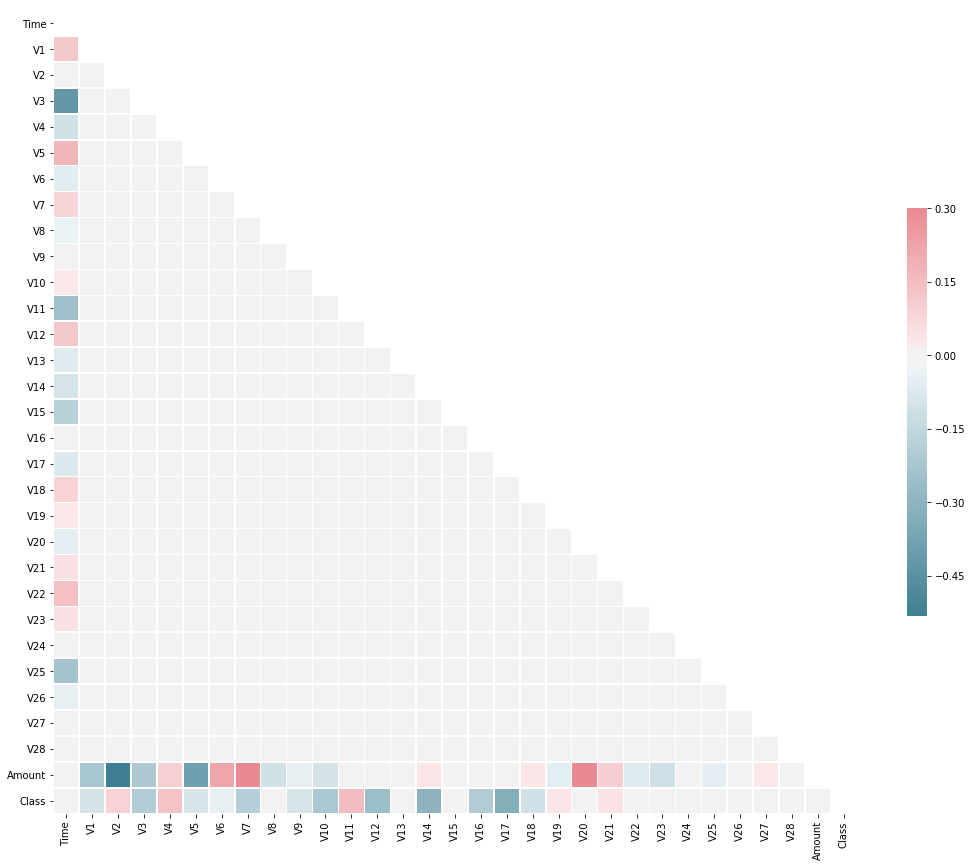

In [5]:
# Plotting the correlation 

adjustment = np.zeros_like(correlation, dtype = np.bool)
adjustment[np.triu_indices_from(adjustment)] = True

fig, ax = plt.subplots(figsize = (18, 15))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(correlation, mask = adjustment, cmap = cmap, vmax = 0.3, center = 0,
            square = True, linewidths = 0.5, cbar_kws={"shrink": 0.5})

### Scaling the variables Amount

In [9]:
df['Scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Amount'], axis = 1)

# Dropping the Time

df = df.drop(['Time'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### Assigning X and y and splitting

In [10]:
X = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']

In [13]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

### Training Decision Tree Classifier

In [14]:
classifier = DecisionTreeClassifier(random_state = 123,
                                   criterion = 'gini',
                                   splitter = 'best',
                                   min_samples_leaf = 1,
                                   min_samples_split = 2)

# Fitting the classifier

classifier.fit(X_train, y_train)

# Predicting the Test Set

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Decision tree', accuracy, precision, recall, f1]],
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

### Training Random Forest Classifier

In [16]:
classifier = RandomForestClassifier(random_state = 123,
                                   n_estimators = 100,
                                   criterion = 'entropy')

# Fitting the classifier

classifier.fit(X_train, y_train)

# Predicting the Test Set

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Random Forest (n=100)', accuracy, precision, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model, ignore_index = True)

/Users/ilya.ivolgin/miniconda3/envs/day2/lib/python3.5/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


### Artificial Neural Network Model

In [18]:
classifier = Sequential()

# Input layer and the first hidden layer

classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))

# Second hidden layer

classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# Output layer

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN

classifier.fit(X_train, y_train, batch_size = 32, epochs = 15)

Epoch 1/15
227845/227845 [==============================] - 573s 3ms/step - loss: 0.0140 - acc: 0.9988
Epoch 2/15
227845/227845 [==============================] - 570s 3ms/step - loss: 0.0029 - acc: 0.9994
Epoch 3/15
227845/227845 [==============================] - 573s 3ms/step - loss: 0.0028 - acc: 0.9994
Epoch 4/15
227845/227845 [==============================] - 573s 3ms/step - loss: 0.0028 - acc: 0.9994
Epoch 5/15
227845/227845 [==============================] - 574s 3ms/step - loss: 0.0027 - acc: 0.9995
Epoch 6/15
227845/227845 [==============================] - 577s 3ms/step - loss: 0.0026 - acc: 0.9994
Epoch 7/15
227845/227845 [==============================] - 573s 3ms/step - loss: 0.0026 - acc: 0.9995
Epoch 8/15
227845/227845 [==============================] - 570s 3ms/step - loss: 0.0025 - acc: 0.9995
Epoch 9/15
227845/227845 [==============================] - 574s 3ms/step - loss: 0.0025 - acc: 0.9995
Epoch 10/15
227845/227845 [==============================] - 575s 3ms/ste

In [19]:
# Getting the score

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
score = classifier.evaluate(X_test, y_test)
score

56962/56962 [==============================] - 37s 641us/step


[0.0029556312098463671, 0.99929777746567883]

In [22]:
# Confusion matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[56827,    20],
       [   20,    95]])

In [23]:
# Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.83      0.83      0.83       115

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [24]:
# Result

print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Test Data Accuracy: 0.9993


In [26]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                450       
_________________________________________________________________
dense_5 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16        
Total params: 706
Trainable params: 706
Non-trainable params: 0
_________________________________________________________________


Train on 213605 samples, validate on 71202 samples
Epoch 1/15
213605/213605 [==============================] - 921s 4ms/step - loss: 0.0026 - acc: 0.9994 - val_loss: 0.0020 - val_acc: 0.9996
Epoch 2/15
213605/213605 [==============================] - 923s 4ms/step - loss: 0.0025 - acc: 0.9994 - val_loss: 0.0022 - val_acc: 0.9996
Epoch 3/15
213605/213605 [==============================] - 1027s 5ms/step - loss: 0.0024 - acc: 0.9994 - val_loss: 0.0022 - val_acc: 0.9996
Epoch 4/15
213605/213605 [==============================] - 935s 4ms/step - loss: 0.0024 - acc: 0.9994 - val_loss: 0.0021 - val_acc: 0.9996
Epoch 5/15
213605/213605 [==============================] - 943s 4ms/step - loss: 0.0022 - acc: 0.9995 - val_loss: 0.0025 - val_acc: 0.9996
Epoch 6/15
213605/213605 [==============================] - 936s 4ms/step - loss: 0.0023 - acc: 0.9994 - val_loss: 0.0022 - val_acc: 0.9996
Epoch 7/15
213605/213605 [==============================] - 936s 4ms/step - loss: 0.0023 - acc: 0.9994 - val

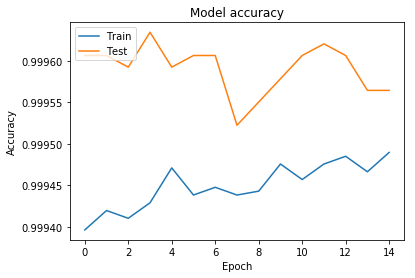

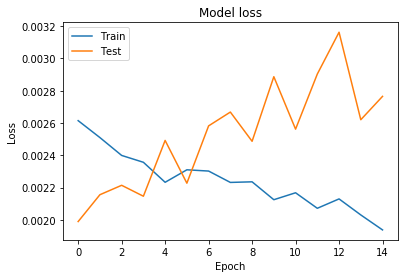

In [38]:
history = classifier.fit(X, y, validation_split=0.25, epochs=15, batch_size=16, verbose=1)

# Plot training & validation accuracy values

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()